In [1]:
from datetime import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
sns.set_style('darkgrid')

### Phân tích dựa vào số lượng bình luận

#### Review việt

In [40]:
df_cmt = pd.read_csv('Hanoi_cmt_Viet.csv')
df_cmt

,HComment,HCommenter,HContribute,HDate,HThanks,HTime,HTravelType,HTravelerRating,h_Hotel_name,h_reviewer_address,h_reviewer_id,h_title_comment,h_url
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.tripadvisor.com.vn/Hotel_Review-g2...
1,KS Melia Hà nội nhìn chung có dịch vụ hoàn hảo...,nguyenthuhu0ng,1.0,tháng 1 năm 2021,2.0,thg 1 2021,NaN,50.0,Melia Hà Nội,"Thành phố Hồ Chí Minh, Việt Nam",https://www.tripadvisor.com.vn/Profile/nguyent...,Excellent,https://www.tripadvisor.com.vn/Hotel_Review-g2...
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.tripadvisor.com.vn/Hotel_Review-g2...
3,"Rất sạch, nhân viên lịch sự, thân thiện. Khách...",chung43,1.0,tháng 1 năm 2020,2.0,thg 1 2020,NaN,50.0,Melia Hà Nội,"Thành phố Hồ Chí Minh, Việt Nam",https://www.tripadvisor.com.vn/Profile/chung43,TS.BS. Nguyễn Hữu Chung,https://www.tripadvisor.com.vn/Hotel_Review-g2...
4,9:58 AM 13/11/2021 Tôi có gọi book bàn ăn tại ...,Nguyễn Tuấn Hải,1.0,tháng 11 năm 2021,NaN,thg 11 2021,NaN,10.0,JW Marriott Hotel Hanoi,NaN,https://www.tripadvisor.com.vn/Profile/HAI1909,Lễ Tân thiếu chuyên nghiệp,https://www.tripadvisor.com.vn/Hotel_Review-g2...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10734,"Amazing! I really like hotel. New hotel, clean...",Bằng,1.0,tháng 11 năm 2020,NaN,đã viết đánh giá vào thg 11 2020,NaN,50.0,Mina Hotel & Spa,NaN,https://www.tripadvisor.com.vn/Profile/Bang_Peach,Kì nghỉ tuyệt vời!\r\nWonderful vacation,https://www.tripadvisor.com.vn/Hotel_Review-g2...
10735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.tripadvisor.com.vn/Hotel_Review-g2...
10736,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.tripadvisor.com.vn/Hotel_Review-g2...
10737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.tripadvisor.com.vn/Hotel_Review-g2...


In [8]:
# Chuyển từ "thg x xxxx" sang "x/xxxx"
df_cmt['HTime_new'] = df_cmt['HTime'].str.replace(r' đã viết đánh giá vào thg ','')
df_cmt['HTime_new'] = df_cmt['HTime_new'].str.replace(r'thg ','')
df_cmt['HTime_new'] = df_cmt['HTime_new'].str.replace(r' ','/')
df_cmt['HTime_new'] = df_cmt['HTime_new'].str.replace(r'/đã/viết/đánh/giá/vào/','')
df_cmt['HTime_new']

0            NaN
1         1/2021
2            NaN
3         1/2020
4        11/2021
          ...   
10734    11/2020
10735        NaN
10736        NaN
10737        NaN
10738     5/2017
Name: HTime_new, Length: 10739, dtype: object

In [9]:
# Xóa những dữ liệu thiếu
x = df_cmt['HTime_new'].dropna() 

In [12]:
# Chuyển các biến str sang dạng date
a = []
for i in range(len(x)):
    try: 
        b = datetime.strptime(x.iloc[i],'%m/%Y')
        a.append(b)
    except:
        continue
a = pd.Series(a, name = 'Time')
a

0      2021-01-01
1      2020-01-01
2      2021-11-01
3      2019-05-01
4      2021-10-01
          ...    
7865   2021-01-01
7866   2019-11-01
7867   2020-12-01
7868   2020-11-01
7869   2017-05-01
Name: Time, Length: 7870, dtype: datetime64[ns]

In [13]:
# Sort_values
t = pd.DataFrame(a)
t = t.sort_values(by = 'Time',ascending=False)

In [14]:
# Đếm số bình luận của từng tháng
x = t.groupby('Time')['Time'].count()
x = pd.DataFrame(x)
x

,Time
Time,
2013-10-01,1
2013-12-01,2
2014-02-01,3
2014-03-01,5
2014-04-01,2
...,...
2021-11-01,33
2021-12-01,34
2022-01-01,19


###### Biểu đồ Line biểu thị số lượng bình luận qua các năm

Text(0, 0.5, 'Comment')

<Figure size 576x576 with 0 Axes>

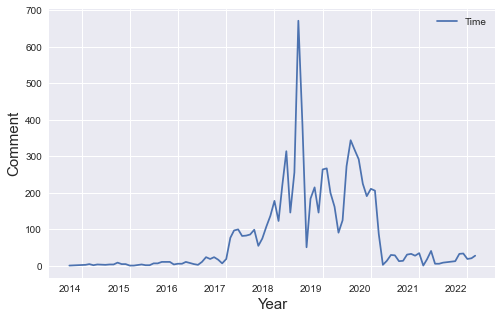

In [16]:
plt.figure(figsize=(8, 8))
plt.style.use('seaborn')
x.plot()
plt.xticks(rotation = 0, fontsize=10)
plt.xticks(fontsize=10)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Comment', fontsize=15)

- Ở đây ta có thể thấy, Hà Nội là thủ đô của nước Việt Nam. Theo lẽ thường thì số người đến du lịch ở đây và bình luận về khách sạn họ ở lại phải nhiều. Nhưng ta có thể thấy từ giữa năm 2013 đến tháng 6 năm 2017 số người bình luận là rất ít.<br>
- Điều này có nghĩa lúc bấy giờ du lịch vẫn theo hướng tự phát, không có kế hoạch cụ thể, đa số thông qua người quen để đặt phòng khách sạn chứ không có dựa vào web môi giới (ở đây sử dụng web **Tripadvisor** để phân tích) để đặt phòng khách sạn để đặt phòng khách sạn hợp lí. <br>
- Từ tháng 6 năm 2017 đến tháng 7 năm 2019 ta có thể thấy số khách du lịch sử dụng web môi giới Tripadvisor để đặt phòng ngày càng tăng. Hay nói cách khác, các khách du lịch ngày càng biết sử dụng khoa học công nghệ để tìm ra khách sạn nào phù hợp với nhu cầu du lịch, điều kiện kinh tế của bản thân. <br>
- Thế nhưng, dựa vào biểu đồ ta có thể thấy, từ cuối năm 2019, với sự xuất hiện của dịch Covid-19, số người bình luận về khách sạn họ ở hay nói cách khác là khách đi du lịch ngày càng giảm. Và giảm mạnh nhất vào tháng 2 2021 khi dịch bệnh bùng phát mạnh mẽ ở thủ đô Hà Nội và tình trạng đó kéo dài cho đến nay.


#### Phân tích dựa vào biến HTravelerRating

In [41]:
df_cmt.HTravelerRating.value_counts()

50.0    5601
40.0    1116
10.0     472
30.0     462
20.0     228
Name: HTravelerRating, dtype: int64

<AxesSubplot:xlabel='HTravelerRating', ylabel='count'>

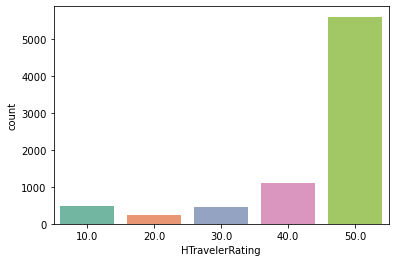

In [125]:
sns.countplot(data=df_cmt,x='HTravelerRating', palette="Set2")

Nhận xét: Số lượng rating 5 sao cho các khách sạn ở Hà Nội nhiều hơn nhiều lần tổng rating 1 đến 4 sao.

=> Điều này có nghĩa rằng các khách sạn ở Hà Nội đáp ứng đủ nhu cầu của khách hàng.


#### Review Anh

In [75]:
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm
%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['figure.dpi'] = 50
plt.rcParams.update({'font.size': 18})
import os
import string
from scipy.stats import norm
from wordcloud import WordCloud,STOPWORDS
stopwords = list(STOPWORDS)

In [76]:
df_cmt = pd.read_csv('Hanoi.csv')

In [77]:
# Kiem tra cac gia tri null
df_cmt.isnull().sum()

HComment               3151
HCommenter             3153
HContribute            3333
HDate                  3223
HThanks               13523
HTime                  3151
HTravelType           13160
HTravelerRating        3129
h_Hotel_name           3089
h_reviewer_address    21221
h_reviewer_id          3314
h_title_comment        3153
h_url                     0
dtype: int64

In [78]:
import re

def  clean_text(text):
    """
    Làm sạch các dữ liệu
    * ký hiệu
    * đổi thành chữ thường
    """
    text = text.str.lower()
    text = text.apply(lambda T: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", str(T))  )
        
    return text

In [79]:
# Cho thấy các trường của data
df_cmt.columns.values

array(['HComment', 'HCommenter', 'HContribute', 'HDate', 'HThanks',
       'HTime', 'HTravelType', 'HTravelerRating', 'h_Hotel_name',
       'h_reviewer_address', 'h_reviewer_id', 'h_title_comment', 'h_url'],
      dtype=object)

In [81]:
df_cmt['HComment']= clean_text(df_cmt['HComment'])
df_cmt_1 = df_cmt[["HComment", 'HTravelerRating']]
df_cmt_2 =  df_cmt_1.dropna() # dropna

<AxesSubplot:>

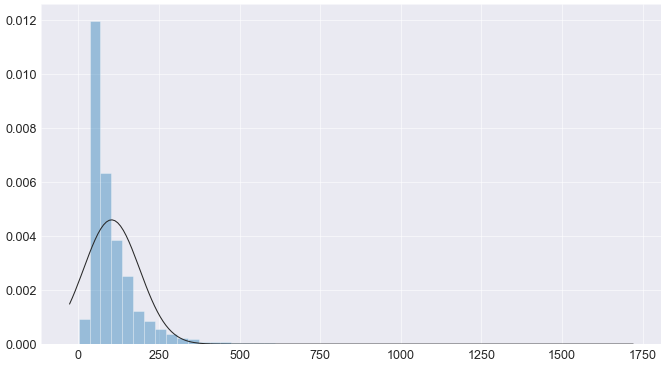

In [82]:
# Lấy số lượng từ trong mỗi bài đánh giá
# Lấy số lượng từ bằng cách tách chúng theo dấu cách
words_per_review = [len(x.split(" ")) for x in df_cmt_2['HComment']]
sns.distplot(words_per_review,fit=norm, kde=False)

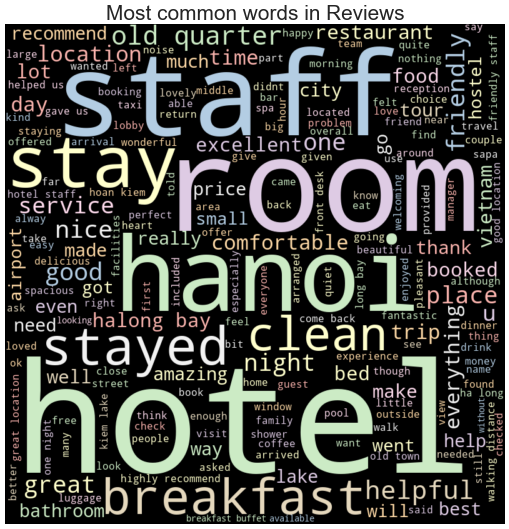

In [84]:
def wordCloud_generator(data_comment):
    wordcloud = WordCloud(width = 800, height = 800,
                          background_color ='black',
                          min_font_size = 10,
                          colormap='Pastel1'
                         ).generate(" ".join(data_comment.values))
    # plot the WordCloud image                        
    plt.figure(figsize = (10, 10), facecolor = None) 
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title("Most common words in Reviews",fontsize=30)
    plt.show() 
    
wordCloud_generator(df_cmt_2['HComment'])

## Phân tích dựa vào đánh giá của khách hàng với khách sạn

In [26]:
df_info = pd.read_csv('Hanoi_Infor.csv')

In [27]:
x = df_info.groupby('HReview')['HReview'].count() # tạo nhóm dữ liệu theo cột Type_words
x = pd.DataFrame(x) # chuyển thành dataframe
x.columns = ['Percent'] # chuyển cột với index là Percent
type_inc = x/sum(x['Percent'])*100
type_inc

,Percent
HReview,
Average,13.157895
Excellent,44.736842
Poor,6.685633
Terrible,3.911807
Very good,31.507824


Text(0, 0.5, 'Percent')

<Figure size 576x576 with 0 Axes>

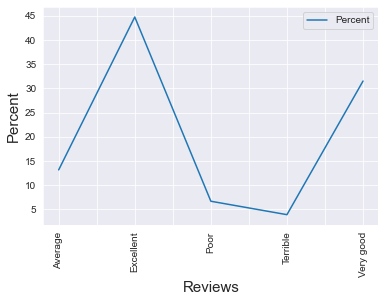

In [28]:
# Vẽ biểu đồ đường
plt.figure(figsize=(8, 8))
type_inc.plot()
plt.xticks(rotation =90, fontsize=10)
plt.xticks(fontsize=10)
plt.xlabel('Reviews', fontsize=15)
plt.ylabel('Percent', fontsize=15)

C:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='HReview'>

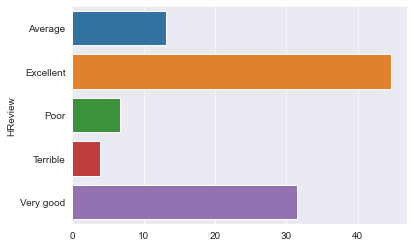

In [29]:
# Biểu đồ cột
percent = []
for i in type_inc['Percent']:
    percent.append(i)
labels = type_inc.index
sns.barplot(percent, labels)

Ta thấy được rằng số lượng khách sạn được đánh giá là Excellent và Very good là rất cao, chiếm số phần trăm lớn hơn so với Average, Poor và Terrible.

=> Chứng tỏ độ thỏa mãn của khách hàng đối với đa số khách sạn ở Hà Nội là rất cao.

=> Khi đi du lịch, thăm quan hay công tác thì ở lại tại các khách sạn Hà Nội là phù hợp.

## Phân tích Linear để dự đoán giá phòng cao nhất của khách sạn

###### Vì ở đây dữ liệu lỗi khi do đường link xuất hiện khá nhiều lên em sẽ phân tích dựa vào dữ liệu có thể dùng được là giá phòng max của khách sạn

In [30]:
df_info = pd.read_csv('Hanoi_Infor.csv')

In [31]:
# Drop dữ liệu thiếu và reset index
df_1 = df_info.dropna()
df_2 = df_1.copy()
df_2 = df_2.reset_index(drop = True)

In [32]:
# Thêm cột số thứ tự của từng khách sạn
df_2.head(5)
df_2.index.names = ['index']
x = []
for i in range(0, 235):
    a = i + 1
    x.append(a)
df_2.insert(0, 'Number', pd.Series(x), allow_duplicates=False)


In [33]:
# Bỏ kí hiệu $ để tiến hành phân tích
df_2['HPMax'] = df_2['HPMax'].str.replace(r'$','')
df_2['HPMin'] = df_2['HPMin'].str.replace(r'$','')

In [34]:
df_2.head(3)

,Number,HAddress,HAttractions,HGFW,HImages,HLanguage,HName,HPMax,HPMin,HPRange,...,HRNumber,HRank,HRankreview,HRating,HRestaurants,HReview,HRoom,HStyles,HVideos,URL
index,,,,,,,,,,,,,,,,,,,,,
0,1,"18 Bao Khanh Lane Hoan Kiem, Hanoi 10000 Vietnam",188.0,100.0,158.0,"English, Chinese, Japanese, Vietnamese",Sunline Hotel,56,29,"$29, - ,$56",...,341,#128 of 704 hotels in Hanoi,4.5,3.5 of 5 bubbles,566.0,Excellent,32,"Classic,Quiet",24.0,https://www.tripadvisor.com/Hotel_Review-g2939...
1,2,"76 Yen Phu Street Tay Ho District, Hanoi 10000...",2.0,82.0,197.0,"English, Chinese, Vietnamese",The Hanoi Club Hotel & Residences,110,58,"$58, - ,$110",...,345,#194 of 704 hotels in Hanoi,4.0,4.0 of 5 bubbles,37.0,Very good,140,Lake View,1.0,https://www.tripadvisor.com/Hotel_Review-g2939...
2,3,"62 Hang Be Hoan Kiem Dist, Hanoi 10000 Vietnam",166.0,100.0,139.0,"English, Vietnamese",Au Coeur d'Hanoi Boutique Hotel,61,41,"$41, - ,$61",...,349,#93 of 704 hotels in Hanoi,5.0,3.0 of 5 bubbles,581.0,Excellent,25,City View,16.0,https://www.tripadvisor.com/Hotel_Review-g2939...


In [35]:
# Chuyển từ dạng str sang float để phân tích
# for i in range(len(df_2['HPMax'])):
#     try:
#         if type(df_2['HPMax'].iloc[i]) == str:
#             df_2['HPMax'].iloc[i] = float(df_2['HPMax'].iloc[i])
#     except:
#         continue    

In [36]:
# Chuyển từ dạng str sang float để phân tích
df_2['HPMax'] = df_2['HPMax'].astype('float64') 

In [37]:
df_2.describe()

,Number,HAttractions,HGFW,HImages,HPMax,HRImages,HRankreview,HRestaurants,HVideos
count,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000
mean,118.000000,105.872340,94.072340,151.676596,82.723404,43.331915,16.940426,369.978723,32.595745
std,67.982841,70.801159,12.762085,178.701984,92.085129,55.860178,18.714472,219.190711,58.113380
min,1.000000,0.000000,37.000000,1.000000,1.000000,1.000000,2.000000,13.000000,1.000000
25%,59.500000,33.000000,97.000000,33.000000,36.500000,11.000000,4.500000,168.000000,4.000000
50%,118.000000,134.000000,100.000000,92.000000,62.000000,27.000000,5.000000,401.000000,12.000000
75%,176.500000,159.000000,100.000000,196.000000,93.000000,55.000000,40.000000,531.000000,30.000000
max,235.000000,238.000000,100.000000,1184.000000,793.000000,468.000000,50.000000,1027.000000,380.000000


Text(0.5, 1.0, 'Linear Regression')

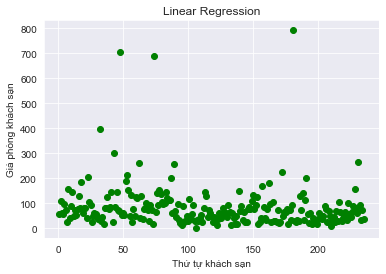

In [38]:
# Vẽ biểu đồ để thấy sự phân bố của giá phòng
x = df_2["Number"]
y = df_2[['HPMax']]
plt.plot(x,y,'go')
plt.xlabel('Thứ tự khách sạn')
plt.ylabel('Giá phòng khách sạn')
plt.title('Linear Regression')

In [39]:
# Các biến của tập train
names = ['HAttractions','HGFW','HImages','HRImages','HRankreview', 'HRestaurants','HVideos']
X_train = df_2[names]
X_train

,HAttractions,HGFW,HImages,HRImages,HRankreview,HRestaurants,HVideos
index,,,,,,,
0,188.0,100.0,158.0,34.0,4.5,566.0,24.0
1,2.0,82.0,197.0,10.0,4.0,37.0,1.0
2,166.0,100.0,139.0,18.0,5.0,581.0,16.0
3,138.0,97.0,96.0,32.0,5.0,463.0,27.0
4,211.0,97.0,103.0,59.0,4.5,712.0,8.0
...,...,...,...,...,...,...,...
230,142.0,100.0,404.0,196.0,50.0,464.0,1.0
231,12.0,96.0,166.0,87.0,40.0,110.0,25.0
232,223.0,100.0,81.0,35.0,45.0,723.0,1.0


In [40]:
Y_train= df_2['HPMax']
Y_train

index
0       56.0
1      110.0
2       61.0
3       57.0
4       96.0
       ...  
230    266.0
231     91.0
232     31.0
233     72.0
234     37.0
Name: HPMax, Length: 235, dtype: float64

In [41]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train,Y_train)

In [42]:
reg.coef_

array([ 0.02779731, -0.88890879,  0.21408144, -0.08225084, -0.12601225,
        0.04584283, -0.23180841])

In [43]:
reg.intercept_

127.22490736202522

In [45]:
x_test = X_train
y_predict=reg.predict(x_test)
y_predict

array([ 94.40484719,  96.7018431 ,  93.52087617,  77.09291766,
        94.28214994,  82.44187942,  77.10814232,  78.84779829,
        91.67325926, 115.61479967,  71.26234353,  52.37376466,
        96.32828314,  88.68154852,  67.71772258,  78.74658296,
        79.95483538, 130.56403831,  91.28438906,  92.68764002,
        96.41836502,  83.19136403, 162.05210182, 111.79528883,
        84.30327747,  86.70116378,  73.87028983,  97.0131965 ,
        70.41481433,  86.14571748,  85.222965  , 150.75679946,
        48.77743469,  77.16156156,  86.74110784, 109.29079801,
        83.37644329,  79.4075194 ,  59.02182841,  79.18478695,
        82.93446954,  88.46860711, 110.69475627,  73.28103754,
       141.25913051,  85.46425462, 123.37938325, 103.73643934,
       132.86047118,  97.87636309, 148.65407372,  72.40971397,
       101.0379188 ,  79.62440223,  98.57443966,  76.64085596,
        61.11501683, 120.85881135, 117.78639965, 114.81818642,
        86.39379449, 136.44614934,  89.61888288, 121.63

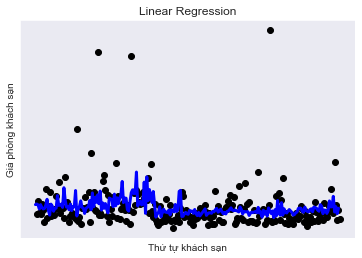

In [46]:
# Xanh là giá trị dự đoán
# Đen là giá trị thực tế
plt.scatter(x,y,  color='black')
plt.plot(y_predict, color='blue', linewidth=5)
plt.xticks(())
plt.yticks(())
plt.xlabel('Thứ tự khách sạn')
plt.ylabel('Giá phòng khách sạn')
plt.title('Linear Regression')
plt.show()

In [114]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_train, y_predict)

7587.567431783166

In [115]:
from sklearn.metrics import r2_score
r2_score(Y_train, y_predict)

0.10138106706210281

#### Ta có thể thấy có thể dùng mô hình Linear để dự đoán giá phòng cao nhất của khách sạn. Mô hình cho thấy có thể dùng Linear để dự đoán giá phòng. Có thể lọc các dữ liệu nhiễu để độ tính toán của mô hình chính xác hơn.